In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import sys
from sqlalchemy import create_engine
from sqlalchemy import inspect
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns




### Importing Data

In [2]:
#import engine data using SQL alchemy

engine = create_engine('sqlite:///SQL/mta_data.db')


In [3]:
""""Function used to create individual dataframes for individual stations. Create 2 new dataframes """


yankee_stad_df = pd.read_sql('SELECT * FROM mta_details WHERE STATION == "161/YANKEE STAD" AND ENTRIES IS NOT NULL',engine)
eightsix_df = pd.read_sql('SELECT * FROM mta_details WHERE STATION == "86 ST"AND ENTRIES IS NOT NULL',engine)
#create a list of the dataframes we will be using
df_list = [yankee_stad_df,eightsix_df]


for df in df_list:
    display (df.info())
                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271 entries, 0 to 20270
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CA        20271 non-null  object
 1   UNIT      20271 non-null  object
 2   SCP       20271 non-null  object
 3   STATION   20271 non-null  object
 4   LINENAME  20271 non-null  object
 5   DIVISION  20271 non-null  object
 6   DATE      20271 non-null  object
 7   TIME      20271 non-null  object
 8   DESC      20271 non-null  object
 9   ENTRIES   20271 non-null  int64 
 10  EXITS     20271 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33738 entries, 0 to 33737
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CA        33738 non-null  object
 1   UNIT      33738 non-null  object
 2   SCP       33738 non-null  object
 3   STATION   33738 non-null  object
 4   LINENAME  33738 non-null  object
 5   DIVISION  33738 non-null  object
 6   DATE      33738 non-null  object
 7   TIME      33738 non-null  object
 8   DESC      33738 non-null  object
 9   ENTRIES   33738 non-null  int64 
 10  EXITS     33738 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


None

### Data Cleaning

In [4]:
#Create a function to create a new column to store datetime as a datetime type
def convert_datetime(dataframe):
    dataframe ['DATE_TIME'] = pd.to_datetime(dataframe['DATE']+" "+dataframe['TIME'])
   

for df in df_list:
    convert_datetime(df)


for df in df_list:
    display(df.head())


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,N203,R195,00-00-00,161/YANKEE STAD,BD4,IND,03/30/2019,00:22:00,REGULAR,5978749,5899302,2019-03-30 00:22:00
1,N203,R195,00-00-00,161/YANKEE STAD,BD4,IND,03/30/2019,04:22:00,REGULAR,5978754,5899317,2019-03-30 04:22:00
2,N203,R195,00-00-00,161/YANKEE STAD,BD4,IND,03/30/2019,08:22:00,REGULAR,5978823,5899393,2019-03-30 08:22:00
3,N203,R195,00-00-00,161/YANKEE STAD,BD4,IND,03/30/2019,12:22:00,REGULAR,5978986,5899807,2019-03-30 12:22:00
4,N203,R195,00-00-00,161/YANKEE STAD,BD4,IND,03/30/2019,16:22:00,REGULAR,5979389,5900335,2019-03-30 16:22:00


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,C025,R215,00-00-00,86 ST,R,BMT,03/30/2019,00:00:00,REGULAR,213604,78716,2019-03-30 00:00:00
1,C025,R215,00-00-00,86 ST,R,BMT,03/30/2019,04:00:00,REGULAR,213627,78745,2019-03-30 04:00:00
2,C025,R215,00-00-00,86 ST,R,BMT,03/30/2019,08:00:00,REGULAR,213799,78774,2019-03-30 08:00:00
3,C025,R215,00-00-00,86 ST,R,BMT,03/30/2019,12:00:00,REGULAR,214116,78849,2019-03-30 12:00:00
4,C025,R215,00-00-00,86 ST,R,BMT,03/30/2019,16:00:00,REGULAR,214442,79005,2019-03-30 16:00:00


In [5]:
#check to ensure "C/A","UNIT","SCP","STATION","DATE_TIME" is unique for each entry
def check_unique (dataframe):
    unique_count = (dataframe
    .groupby(["CA","UNIT","SCP","STATION","DATE_TIME"])
    .ENTRIES.count()
    .reset_index()
    .sort_values("ENTRIES", ascending = False))
    new_df = unique_count.loc[unique_count.loc[:,'ENTRIES']>1].sort_values("DATE_TIME",ascending = False)
    if new_df.ENTRIES.count()==0:
        return ("All entries are unique")
    else: 
        return new_df


#create new dfs to store count of non-unique entries  
yankee_not_unique = check_unique(yankee_stad_df)
eightsix_not_unique = check_unique(eightsix_df)

#store new dataframes into a list will only use apr_to_june if necessary
not_unique_list = [yankee_not_unique,eightsix_not_unique]







In [6]:
#check which data frames have duplicate entries
for df in not_unique_list:
    display(df)

'All entries are unique'

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
27005,R249,R179,01-05-00,86 ST,2019-06-27 12:00:00,2
27002,R249,R179,01-05-00,86 ST,2019-06-27 08:00:00,2
26998,R249,R179,01-05-00,86 ST,2019-06-27 04:00:00,2
26994,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2


In [7]:
#investigate the duplicate entries and remove duplicates 
#eightsix_not_unique shows on 2019-06-27 all 4 entries for CA R249, UNIT R179, SCP 01-05-00 have duplicates

mask = ((eightsix_df["CA"] =="R249")&
        (eightsix_df["UNIT"] =='R179') &
        (eightsix_df["SCP"]=="01-05-00") &
        (eightsix_df["DATE"] =='06/27/2019'))

eightsix_df[mask]


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
33197,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,00:00:00,REGULAR,6,0,2019-06-27 00:00:00
33198,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,00:00:00,RECOVR AUD,11,0,2019-06-27 00:00:00
33199,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,01:00:00,RECOVR AUD,11,0,2019-06-27 01:00:00
33200,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,02:00:00,RECOVR AUD,11,0,2019-06-27 02:00:00
33201,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,03:00:00,RECOVR AUD,11,0,2019-06-27 03:00:00
33202,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,04:00:00,REGULAR,6,0,2019-06-27 04:00:00
33203,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,04:00:00,RECOVR AUD,11,0,2019-06-27 04:00:00
33204,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,05:00:00,RECOVR AUD,11,0,2019-06-27 05:00:00
33205,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,06:00:00,RECOVR AUD,11,0,2019-06-27 06:00:00
33206,R249,R179,01-05-00,86 ST,456,IRT,06/27/2019,07:00:00,RECOVR AUD,11,0,2019-06-27 07:00:00


In [8]:
#Need to delete the duplicate lines, but fist must sort values by DATE_TIME in descending order

def sort_by_DATETIME(data_frame):
    data_frame.sort_values(["CA","UNIT","SCP","STATION","DATE_TIME"],inplace = True, ascending=False)
    return data_frame
    
    
sort_by_DATETIME(yankee_stad_df)
sort_by_DATETIME(eightsix_df)

"""delete the duplicate rows represented by the recovery audits since 6/28/19 numbers are aligned with
the "REGULAR" numbers."""
eightsix_df.drop_duplicates(subset =["CA","UNIT","SCP","STATION","DATE_TIME"], inplace = True)

display(check_unique(eightsix_df))
display(check_unique(yankee_stad_df))








'All entries are unique'

'All entries are unique'

In [9]:
#get the max entry/exits for each specfic turnstile at each time interval
yankee_daily = yankee_stad_df.groupby(["CA","UNIT","SCP","STATION","DATE","TIME","DATE_TIME","DESC"],as_index = False).first("ENTRIES", "EXITS")
eightsix_daily = eightsix_df.groupby(["CA","UNIT","SCP","STATION","DATE","TIME","DATE_TIME","DESC"],as_index = False).first("ENTRIES", "EXITS")


#store dfs in list 
daily_list = [yankee_daily,eightsix_daily]

display(yankee_daily.head(12))
display(eightsix_daily.head(12))


,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
0,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,00:22:00,2019-03-30 00:22:00,REGULAR,5978749,5899302
1,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,04:22:00,2019-03-30 04:22:00,REGULAR,5978754,5899317
2,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,08:22:00,2019-03-30 08:22:00,REGULAR,5978823,5899393
3,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,12:22:00,2019-03-30 12:22:00,REGULAR,5978986,5899807
4,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,16:22:00,2019-03-30 16:22:00,REGULAR,5979389,5900335
5,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,20:22:00,2019-03-30 20:22:00,REGULAR,5980033,5900563
6,N203,R195,00-00-00,161/YANKEE STAD,03/31/2019,00:22:00,2019-03-31 00:22:00,REGULAR,5980097,5900662
7,N203,R195,00-00-00,161/YANKEE STAD,03/31/2019,04:22:00,2019-03-31 04:22:00,REGULAR,5980102,5900678
8,N203,R195,00-00-00,161/YANKEE STAD,03/31/2019,08:22:00,2019-03-31 08:22:00,REGULAR,5980143,5900747
9,N203,R195,00-00-00,161/YANKEE STAD,03/31/2019,12:22:00,2019-03-31 12:22:00,REGULAR,5980259,5901062


,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
0,C025,R215,00-00-00,86 ST,03/30/2019,00:00:00,2019-03-30 00:00:00,REGULAR,213604,78716
1,C025,R215,00-00-00,86 ST,03/30/2019,04:00:00,2019-03-30 04:00:00,REGULAR,213627,78745
2,C025,R215,00-00-00,86 ST,03/30/2019,08:00:00,2019-03-30 08:00:00,REGULAR,213799,78774
3,C025,R215,00-00-00,86 ST,03/30/2019,12:00:00,2019-03-30 12:00:00,REGULAR,214116,78849
4,C025,R215,00-00-00,86 ST,03/30/2019,16:00:00,2019-03-30 16:00:00,REGULAR,214442,79005
5,C025,R215,00-00-00,86 ST,03/30/2019,20:00:00,2019-03-30 20:00:00,REGULAR,214663,79162
6,C025,R215,00-00-00,86 ST,03/31/2019,00:00:00,2019-03-31 00:00:00,REGULAR,214787,79236
7,C025,R215,00-00-00,86 ST,03/31/2019,04:00:00,2019-03-31 04:00:00,REGULAR,214816,79268
8,C025,R215,00-00-00,86 ST,03/31/2019,08:00:00,2019-03-31 08:00:00,REGULAR,214932,79293
9,C025,R215,00-00-00,86 ST,03/31/2019,12:00:00,2019-03-31 12:00:00,REGULAR,215172,79364


In [10]:
#create separate columns for previous dates and entries/exits
for df in daily_list:
    df[["PREV_DATE","PREV_TIME","PREV_ENTRIES","PREV_EXITS"]] = (df.groupby(["CA","UNIT","SCP","STATION"])[["DATE","TIME","ENTRIES","EXITS"]].shift(1))
    
display(yankee_daily.head(6))
display(eightsix_daily.head(6))

,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS
0,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,00:22:00,2019-03-30 00:22:00,REGULAR,5978749,5899302,NaN,NaN,NaN,NaN
1,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,04:22:00,2019-03-30 04:22:00,REGULAR,5978754,5899317,03/30/2019,00:22:00,5978749.0,5899302.0
2,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,08:22:00,2019-03-30 08:22:00,REGULAR,5978823,5899393,03/30/2019,04:22:00,5978754.0,5899317.0
3,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,12:22:00,2019-03-30 12:22:00,REGULAR,5978986,5899807,03/30/2019,08:22:00,5978823.0,5899393.0
4,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,16:22:00,2019-03-30 16:22:00,REGULAR,5979389,5900335,03/30/2019,12:22:00,5978986.0,5899807.0
5,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,20:22:00,2019-03-30 20:22:00,REGULAR,5980033,5900563,03/30/2019,16:22:00,5979389.0,5900335.0


,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS
0,C025,R215,00-00-00,86 ST,03/30/2019,00:00:00,2019-03-30 00:00:00,REGULAR,213604,78716,NaN,NaN,NaN,NaN
1,C025,R215,00-00-00,86 ST,03/30/2019,04:00:00,2019-03-30 04:00:00,REGULAR,213627,78745,03/30/2019,00:00:00,213604.0,78716.0
2,C025,R215,00-00-00,86 ST,03/30/2019,08:00:00,2019-03-30 08:00:00,REGULAR,213799,78774,03/30/2019,04:00:00,213627.0,78745.0
3,C025,R215,00-00-00,86 ST,03/30/2019,12:00:00,2019-03-30 12:00:00,REGULAR,214116,78849,03/30/2019,08:00:00,213799.0,78774.0
4,C025,R215,00-00-00,86 ST,03/30/2019,16:00:00,2019-03-30 16:00:00,REGULAR,214442,79005,03/30/2019,12:00:00,214116.0,78849.0
5,C025,R215,00-00-00,86 ST,03/30/2019,20:00:00,2019-03-30 20:00:00,REGULAR,214663,79162,03/30/2019,16:00:00,214442.0,79005.0


In [11]:
#drop rows with NaN data in the df
for df in daily_list:
    df.dropna(subset=["PREV_DATE"], axis = 0, inplace =True)

display(yankee_daily.head())
display(eightsix_daily.head())

,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS
1,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,04:22:00,2019-03-30 04:22:00,REGULAR,5978754,5899317,03/30/2019,00:22:00,5978749.0,5899302.0
2,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,08:22:00,2019-03-30 08:22:00,REGULAR,5978823,5899393,03/30/2019,04:22:00,5978754.0,5899317.0
3,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,12:22:00,2019-03-30 12:22:00,REGULAR,5978986,5899807,03/30/2019,08:22:00,5978823.0,5899393.0
4,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,16:22:00,2019-03-30 16:22:00,REGULAR,5979389,5900335,03/30/2019,12:22:00,5978986.0,5899807.0
5,N203,R195,00-00-00,161/YANKEE STAD,03/30/2019,20:22:00,2019-03-30 20:22:00,REGULAR,5980033,5900563,03/30/2019,16:22:00,5979389.0,5900335.0


,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS
1,C025,R215,00-00-00,86 ST,03/30/2019,04:00:00,2019-03-30 04:00:00,REGULAR,213627,78745,03/30/2019,00:00:00,213604.0,78716.0
2,C025,R215,00-00-00,86 ST,03/30/2019,08:00:00,2019-03-30 08:00:00,REGULAR,213799,78774,03/30/2019,04:00:00,213627.0,78745.0
3,C025,R215,00-00-00,86 ST,03/30/2019,12:00:00,2019-03-30 12:00:00,REGULAR,214116,78849,03/30/2019,08:00:00,213799.0,78774.0
4,C025,R215,00-00-00,86 ST,03/30/2019,16:00:00,2019-03-30 16:00:00,REGULAR,214442,79005,03/30/2019,12:00:00,214116.0,78849.0
5,C025,R215,00-00-00,86 ST,03/30/2019,20:00:00,2019-03-30 20:00:00,REGULAR,214663,79162,03/30/2019,16:00:00,214442.0,79005.0


In [12]:
#check which entries have timestamps not in alignment with the 4 hour periods 
yankee_time_list = ['00:22:00','04:22:00','08:22:00', '12:22:00','16:22:00','20:22:00']
eightsix_time_list = ['00:00:00','04:00:00','08:00:00', '12:00:00','16:00:00','20:00:00']
def yankee_obscure_time(time): 
    if time in yankee_time_list:
        return True
    else:
        return False 
def eightsix_obscure_time(time): 
    if time in eightsix_time_list:
        return True
    else:
        return False 
yankee_obsctime_mask = (yankee_daily.TIME.apply(yankee_obscure_time) == False)

eightsix_obsctime_mask = (eightsix_daily.TIME.apply(eightsix_obscure_time) == False)
eightsix_daily[eightsix_obsctime_mask].head()
yankee_daily[yankee_obsctime_mask].head()


,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS
110,N203,R195,00-00-00,161/YANKEE STAD,04/17/2019,08:05:12,2019-04-17 08:05:12,REGULAR,6001223,5923076,04/17/2019,04:22:00,6.000934e+06,5.922946e+06
124,N203,R195,00-00-00,161/YANKEE STAD,04/19/2019,10:13:51,2019-04-19 10:13:51,REGULAR,6004834,5926961,04/19/2019,08:22:00,6.004684e+06,5.926847e+06
125,N203,R195,00-00-00,161/YANKEE STAD,04/19/2019,10:15:12,2019-04-19 10:15:12,REGULAR,6004836,5926962,04/19/2019,10:13:51,6.004834e+06,5.926961e+06
658,N203,R195,00-00-01,161/YANKEE STAD,04/17/2019,08:05:12,2019-04-17 08:05:12,REGULAR,1399577523,1094575629,04/17/2019,04:22:00,1.399578e+09,1.094576e+09
672,N203,R195,00-00-01,161/YANKEE STAD,04/19/2019,10:13:51,2019-04-19 10:13:51,REGULAR,1399572587,1094572449,04/19/2019,08:22:00,1.399573e+09,1.094573e+09


In [13]:
#checking if obscure times show any odd data

mask12 = ((eightsix_daily["CA"] =="R250")&
        (eightsix_daily["UNIT"] =='R179') &
        (eightsix_daily["SCP"]=="00-00-0B") &
        (eightsix_daily["DATE"] == "06/06/2019"))
eightsix_daily[mask12]

,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS
33592,R250,R179,00-00-0B,86 ST,06/06/2019,00:00:00,2019-06-06 00:00:00,REGULAR,972584131,301798608,06/05/2019,20:00:00,972584531.0,301798740.0
33593,R250,R179,00-00-0B,86 ST,06/06/2019,04:00:00,2019-06-06 04:00:00,REGULAR,972584104,301798588,06/06/2019,00:00:00,972584131.0,301798608.0
33594,R250,R179,00-00-0B,86 ST,06/06/2019,08:00:00,2019-06-06 08:00:00,REGULAR,972583727,301798220,06/06/2019,04:00:00,972584104.0,301798588.0
33595,R250,R179,00-00-0B,86 ST,06/06/2019,12:00:00,2019-06-06 12:00:00,REGULAR,972582512,301797914,06/06/2019,08:00:00,972583727.0,301798220.0
33596,R250,R179,00-00-0B,86 ST,06/06/2019,16:00:00,2019-06-06 16:00:00,REGULAR,972581539,301797572,06/06/2019,12:00:00,972582512.0,301797914.0
33597,R250,R179,00-00-0B,86 ST,06/06/2019,19:21:39,2019-06-06 19:21:39,REGULAR,972580416,301797343,06/06/2019,16:00:00,972581539.0,301797572.0
33598,R250,R179,00-00-0B,86 ST,06/06/2019,20:00:00,2019-06-06 20:00:00,REGULAR,972580274,301797303,06/06/2019,19:21:39,972580416.0,301797343.0


In [14]:
#the additional time stamps are unecessary and can be deleted (totals will get calculated off the 4hr entries)
yankee_daily.drop(yankee_daily[yankee_obsctime_mask].index, inplace = True)
eightsix_daily.drop(eightsix_daily[eightsix_obsctime_mask].index, inplace = True)

print(set(yankee_daily["TIME"]))
print(set(eightsix_daily["TIME"]))


#Update the time to change to the top each hour (only 22 mins off)

time_dict = {'00:22:00':'00:00:00', '04:22:00':'04:00:00', 
             '08:22:00':'08:00:00','12:22:00':'12:00:00', 
             '16:22:00':'16:00:00','20:22:00':'20:00:00'}

yankee_daily.replace({"TIME": time_dict}, inplace = True)

{'12:22:00', '00:22:00', '08:22:00', '16:22:00', '04:22:00', '20:22:00'}
{'04:00:00', '12:00:00', '08:00:00', '16:00:00', '00:00:00', '20:00:00'}


In [15]:
#gather info about the entries as a sanity check

for df in daily_list:
    display((df["ENTRIES"] - df["PREV_ENTRIES"]).describe()) #Looks though there are negative values
    display((df["EXITS"] - df["PREV_EXITS"]).describe())

count    20154.000000
mean       103.250571
std        190.115433
min      -1063.000000
25%          0.000000
50%          8.000000
75%        178.000000
max       1634.000000
dtype: float64

count    20154.000000
mean        60.051454
std        132.880240
min       -948.000000
25%          0.000000
50%          5.000000
75%         82.000000
max       1386.000000
dtype: float64

count     23346.000000
mean        181.974814
std        1938.507852
min     -292848.000000
25%          22.000000
50%         122.000000
75%         301.000000
max        1617.000000
dtype: float64

count    23346.000000
mean       174.586824
std        738.201097
min     -98130.000000
25%         13.000000
50%         58.000000
75%        193.000000
max       3003.000000
dtype: float64

In [16]:
#how many rows are backwards
for df in daily_list:
    display(df[df["ENTRIES"]< df["PREV_ENTRIES"]].shape)
    display(df[df["EXITS"]< df["PREV_EXITS"]].shape)

(541, 14)

(545, 14)

(547, 14)

(1090, 14)

In [17]:
#look at the individual turnstiles that are experiencing negative entries.
mask1 = ((yankee_stad_df["CA"] =="N203")&
        (yankee_stad_df["UNIT"] =='R195') &
        (yankee_stad_df["SCP"]=="00-00-01") &
        (yankee_stad_df["DATE_TIME"].dt.date == dt.datetime(2019,3,30).date()))



In [18]:
yankee_stad_df[mask1]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
47,N203,R195,00-00-01,161/YANKEE STAD,BD4,IND,03/30/2019,20:22:00,REGULAR,1399608427,1094592976,2019-03-30 20:22:00
46,N203,R195,00-00-01,161/YANKEE STAD,BD4,IND,03/30/2019,16:22:00,REGULAR,1399609184,1094593141,2019-03-30 16:22:00
45,N203,R195,00-00-01,161/YANKEE STAD,BD4,IND,03/30/2019,12:22:00,REGULAR,1399609724,1094593513,2019-03-30 12:22:00
44,N203,R195,00-00-01,161/YANKEE STAD,BD4,IND,03/30/2019,08:22:00,REGULAR,1399609993,1094593839,2019-03-30 08:22:00
43,N203,R195,00-00-01,161/YANKEE STAD,BD4,IND,03/30/2019,04:22:00,REGULAR,1399610132,1094593884,2019-03-30 04:22:00
42,N203,R195,00-00-01,161/YANKEE STAD,BD4,IND,03/30/2019,00:22:00,REGULAR,1399610147,1094593895,2019-03-30 00:22:00


In [19]:
'''get the daily counts while also addressing negative entries and outliers.
Used for enrty/exit counts that are correct but counted backwards''' 

def daily_entries_switched(row,max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter <0:
        counter = -counter
    if counter >max_counter:
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter >max_counter:
        return 0
    return counter 

def daily_exits_switched(row,max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter <0:
        counter = -counter
    if counter >max_counter:
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter >max_counter:
        return 0
    return counter
        
eightsix_daily["DAILY_ENTRIES"] = eightsix_daily.apply(daily_entries_switched, axis=1, max_counter=100000)
eightsix_daily["DAILY_EXITS"] = eightsix_daily.apply(daily_exits_switched, axis=1, max_counter=95000)
display(eightsix_daily.describe())


yankee_daily["DAILY_ENTRIES"] = yankee_daily.apply(daily_entries_switched, axis=1, max_counter=100000)
yankee_daily["DAILY_EXITS"] = yankee_daily.apply(daily_exits_switched, axis=1, max_counter=100000)
display(yankee_daily.describe())


entries: 207 <-- 293055.0
exits: 11 <-- 98141.0


,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
count,2.334600e+04,2.334600e+04,2.334600e+04,2.334600e+04,23346.000000,23346.000000
mean,5.405710e+07,5.935183e+07,5.405692e+07,5.935165e+07,222.345113,197.261415
std,1.971491e+08,2.847237e+08,1.971492e+08,2.847238e+08,260.579412,352.168306
min,5.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.638152e+05,9.664550e+04,2.636922e+05,9.652050e+04,28.000000,18.000000
50%,4.435119e+06,2.031432e+06,4.435048e+06,2.031404e+06,131.000000,67.000000
75%,1.662590e+07,1.138524e+07,1.662575e+07,1.138421e+07,320.000000,217.000000
max,9.728307e+08,1.876129e+09,9.728307e+08,1.876129e+09,1617.000000,3003.000000


,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
count,2.015400e+04,2.015400e+04,2.015400e+04,2.015400e+04,20154.000000,20154.00000
mean,5.484724e+07,3.599521e+07,5.484713e+07,3.599515e+07,119.261784,69.51300
std,2.415683e+08,1.790057e+08,2.415683e+08,1.790058e+08,180.502101,128.18431
min,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000,0.00000
25%,1.923120e+05,7.713200e+04,1.917860e+05,7.713200e+04,0.000000,0.00000
50%,1.016534e+06,3.336430e+05,1.016500e+06,3.336430e+05,14.000000,8.00000
75%,4.360431e+06,1.708644e+06,4.359930e+06,1.708603e+06,192.000000,92.00000
max,1.399610e+09,1.094594e+09,1.399610e+09,1.094594e+09,1634.000000,1386.00000


In [20]:
#create a column that checks the day of the week for each entry
eightsix_daily["DATE"]=eightsix_daily["DATE"].apply(pd.to_datetime)
eightsix_daily["DAY_OF_WEEK"] = eightsix_daily['DATE']




In [21]:
#convert day of week column to a str of day of week 

eightsix_daily["DATE"]=eightsix_daily["DATE"].apply(pd.to_datetime)
eightsix_daily["DAY_OF_WEEK_NUM"] = eightsix_daily['DATE'].dt.dayofweek
eightsix_daily['DAY_OF_WEEK'] = eightsix_daily['DAY_OF_WEEK_NUM'].apply(str)



In [22]:
#update values in DAY_OF_WEEK to names of days
days_of_week = {'0':"Monday",'1':"Tuesday",'2':"Wednesday",'3':"Thursday",
                '4':"Friday",'5':"Saturday",'6':"Sunday",}


eightsix_daily.replace({"DAY_OF_WEEK": days_of_week}, inplace = True)
display(eightsix_daily.head(6))







,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_WEEK,DAY_OF_WEEK_NUM
1,C025,R215,00-00-00,86 ST,2019-03-30,04:00:00,2019-03-30 04:00:00,REGULAR,213627,78745,03/30/2019,00:00:00,213604.0,78716.0,23.0,29.0,Saturday,5
2,C025,R215,00-00-00,86 ST,2019-03-30,08:00:00,2019-03-30 08:00:00,REGULAR,213799,78774,03/30/2019,04:00:00,213627.0,78745.0,172.0,29.0,Saturday,5
3,C025,R215,00-00-00,86 ST,2019-03-30,12:00:00,2019-03-30 12:00:00,REGULAR,214116,78849,03/30/2019,08:00:00,213799.0,78774.0,317.0,75.0,Saturday,5
4,C025,R215,00-00-00,86 ST,2019-03-30,16:00:00,2019-03-30 16:00:00,REGULAR,214442,79005,03/30/2019,12:00:00,214116.0,78849.0,326.0,156.0,Saturday,5
5,C025,R215,00-00-00,86 ST,2019-03-30,20:00:00,2019-03-30 20:00:00,REGULAR,214663,79162,03/30/2019,16:00:00,214442.0,79005.0,221.0,157.0,Saturday,5
6,C025,R215,00-00-00,86 ST,2019-03-31,00:00:00,2019-03-31 00:00:00,REGULAR,214787,79236,03/30/2019,20:00:00,214663.0,79162.0,124.0,74.0,Sunday,6


In [23]:
#hardcode dates for yankee home games within our 3 month period. 

yankee_home_games = ['03/28/2019', '03/30/2019', '03/31/2019', 
                      '04/01/2019', '04/02/2019', '04/03/2019', '04/12/2019', '04/13/2019', '04/14/2019', 
                      '04/15/2019', '04/16/2019', '04/17/2019', '04/18/2019', '04/19/2019', '04/20/2019', '04/21/2019', 
                      '05/03/2019','05/04/2019','05/05/2019','05/06/2019','05/07/2019','05/08/2019','05/09/2019',
                      '05/15/2019','05/17/2019','05/18/2019','05/19/2019','05/27/2019','05/28/2019','05/29/2019',
                      '05/30/2019','05/31/2019','06/01/2019','06/02/2019','06/10/2019','06/11/2019','06/17/2019',
                      '06/18/2019','06/19/2019','06/20/2019','06/21/2019','06/22/2019','06/23/2019','06/24/2019',
                      '06/25/2019','06/26/2019','06/29/2019']
# create a new column which indicates if there is a home game on that date
def is_gameday(date):                     
    if date in yankee_home_games:
        return "TRUE"
    else:
        return "FALSE"
yankee_daily["GAMEDAY"] = yankee_daily.DATE.apply(is_gameday)

In [24]:
#create a mask to help further filter GAMEDAY date
gameday_mask = (yankee_daily["GAMEDAY"] =="TRUE")
nongameday_mask = (yankee_daily["GAMEDAY"] =="FALSE")

In [25]:
#add a day of the week column to the yankee daily df 

yankee_daily["DATE"]=yankee_daily["DATE"].apply(pd.to_datetime)
yankee_daily["DAY_OF_WEEK_NUM"] = yankee_daily['DATE'].dt.dayofweek
yankee_daily['DAY_OF_WEEK'] = yankee_daily['DAY_OF_WEEK_NUM'].apply(str)

yankee_daily.replace({"DAY_OF_WEEK": days_of_week}, inplace = True)
                          
              
display(yankee_daily.head(6))

,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,GAMEDAY,DAY_OF_WEEK_NUM,DAY_OF_WEEK
1,N203,R195,00-00-00,161/YANKEE STAD,2019-03-30,04:00:00,2019-03-30 04:22:00,REGULAR,5978754,5899317,03/30/2019,00:22:00,5978749.0,5899302.0,5.0,15.0,TRUE,5,Saturday
2,N203,R195,00-00-00,161/YANKEE STAD,2019-03-30,08:00:00,2019-03-30 08:22:00,REGULAR,5978823,5899393,03/30/2019,04:22:00,5978754.0,5899317.0,69.0,76.0,TRUE,5,Saturday
3,N203,R195,00-00-00,161/YANKEE STAD,2019-03-30,12:00:00,2019-03-30 12:22:00,REGULAR,5978986,5899807,03/30/2019,08:22:00,5978823.0,5899393.0,163.0,414.0,TRUE,5,Saturday
4,N203,R195,00-00-00,161/YANKEE STAD,2019-03-30,16:00:00,2019-03-30 16:22:00,REGULAR,5979389,5900335,03/30/2019,12:22:00,5978986.0,5899807.0,403.0,528.0,TRUE,5,Saturday
5,N203,R195,00-00-00,161/YANKEE STAD,2019-03-30,20:00:00,2019-03-30 20:22:00,REGULAR,5980033,5900563,03/30/2019,16:22:00,5979389.0,5900335.0,644.0,228.0,TRUE,5,Saturday
6,N203,R195,00-00-00,161/YANKEE STAD,2019-03-31,00:00:00,2019-03-31 00:22:00,REGULAR,5980097,5900662,03/30/2019,20:22:00,5980033.0,5900563.0,64.0,99.0,TRUE,6,Sunday


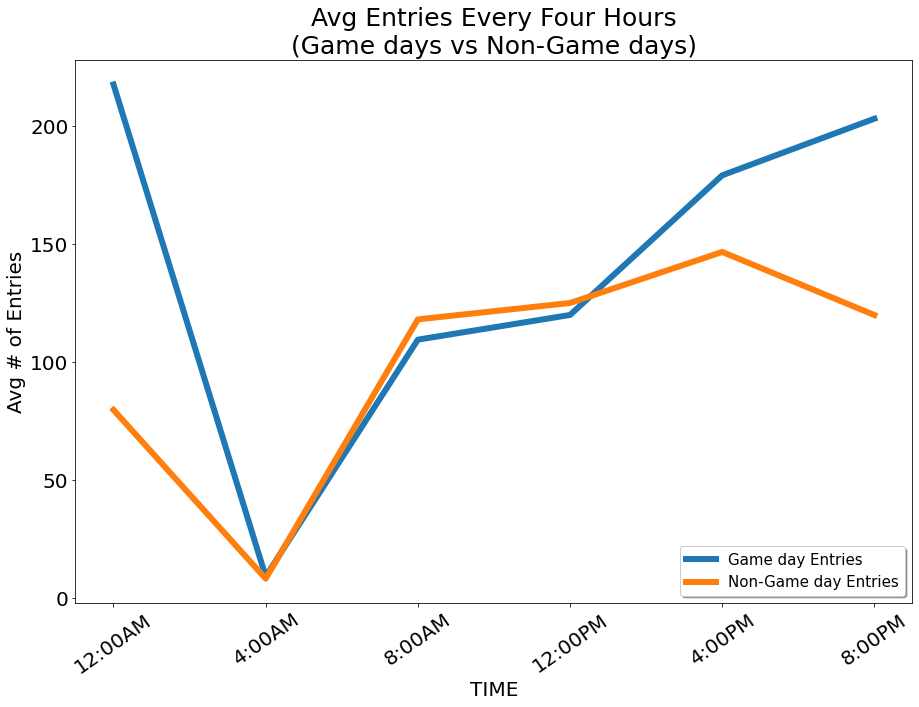

In [26]:
#plot yankee stadium entries gameday vs non-gameday data by time 
plt.figure(figsize=(15, 10))
x_axis_gameday_entry = sorted(yankee_daily['TIME'].unique())
y_axis_gameday_entry = yankee_daily[gameday_mask].groupby(["TIME"]).mean("DAILY_ENTRIES")["DAILY_ENTRIES"]
x_axis_nongameday_entry = sorted(yankee_daily['TIME'].unique())
y_axis_nongameday_entry = yankee_daily[nongameday_mask].groupby(["TIME"]).mean("DAILY_ENTRIES")["DAILY_ENTRIES"]

plt.plot(x_axis_gameday_entry,y_axis_gameday_entry, linewidth = 6)
plt.plot(x_axis_nongameday_entry,y_axis_nongameday_entry,linewidth = 6)

times = ['12:00AM', '4:00AM', '8:00AM','12:00PM', '4:00PM','8:00PM']
ticks_x = np.linspace(0,5,6)
plt.xlabel('TIME', fontsize = 20)
plt.xticks(ticks_x,times, rotation=35, fontsize = 20)

plt.ylabel('Avg # of Entries', fontsize = 20)
plt.yticks(fontsize = 20)

plt.title('Avg Entries Every Four Hours\n(Game days vs Non-Game days)', fontsize = 25)
plt.legend(['Game day Entries','Non-Game day Entries'],shadow = True, loc =4, prop={'size': 15})


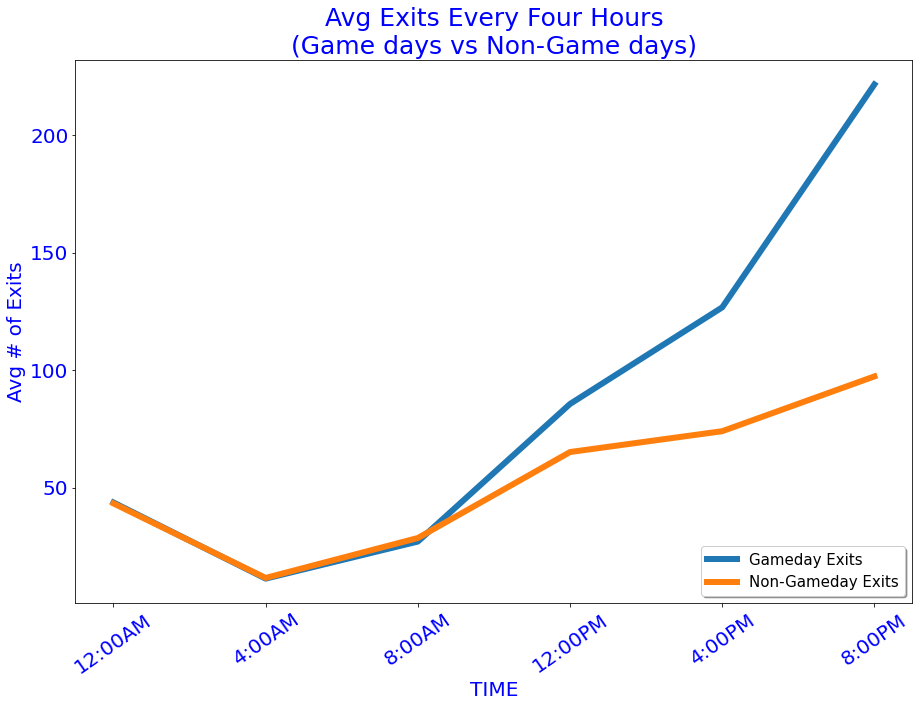

In [27]:
#plot yankee stadium exits gameday vs non-gameday data by time 

plt.figure(figsize=(15, 10))

x_axis_gameday_exit = sorted(yankee_daily['TIME'].unique())
y_axis_gameday_exit = yankee_daily[gameday_mask].groupby(["TIME"]).mean("DAILY_EXITS")["DAILY_EXITS"]
x_axis_nongameday_exit = sorted(yankee_daily['TIME'].unique())
y_axis_nongameday_exit = yankee_daily[nongameday_mask].groupby(["TIME"]).mean("DAILY_EXITS")["DAILY_EXITS"]

plt.plot(x_axis_gameday_exit,y_axis_gameday_exit, linewidth = 6)
plt.plot(x_axis_nongameday_exit,y_axis_nongameday_exit,linewidth = 6)


times = ['12:00AM', '4:00AM', '8:00AM','12:00PM', '4:00PM','8:00PM']
ticks_x = np.linspace(0,5,6)
plt.xlabel('TIME', fontsize = 20, c= 'b')
plt.xticks(ticks_x,times, rotation=35, fontsize = 20,c = 'b')

plt.ylabel('Avg # of Exits', fontsize = 20,c = 'b')
plt.yticks(fontsize = 20, c = 'b')

plt.title('Avg Exits Every Four Hours\n(Game days vs Non-Game days)', fontsize = 25, c = 'b')
plt.legend(['Gameday Exits', 'Non-Gameday Exits'],shadow = True, loc =4, prop={'size': 15})


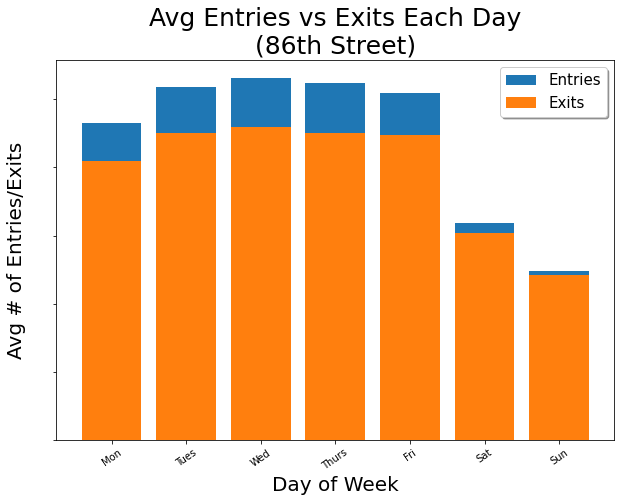

In [28]:
#plot busiest days of the week for 86th street 

plt.figure(figsize=(10, 7))
x_axis_entry = sorted(eightsix_daily['DAY_OF_WEEK_NUM'].unique())
y_axis_entry = eightsix_daily.groupby(["DAY_OF_WEEK_NUM"]).mean("DAILY_ENTRIES")["DAILY_ENTRIES"]

x_axis_exit = sorted(eightsix_daily['DAY_OF_WEEK_NUM'].unique())
y_axis_exit = eightsix_daily.groupby(["DAY_OF_WEEK_NUM"]).mean("DAILY_EXITS")["DAILY_EXITS"]

plt.bar(x_axis_entry,y_axis_entry)
plt.bar(x_axis_exit,y_axis_exit)

days = ['Mon', 'Tues', 'Wed','Thurs', 'Fri','Sat','Sun']
ticks_x = np.linspace(0,6,7)
plt.xlabel('Day of Week', fontsize = 20)
plt.xticks(ticks_x,days, rotation=35, fontsize = 10)

plt.ylabel('Avg # of Entries/Exits', fontsize = 20)
plt.yticks(fontsize = 10, c = 'w')

plt.title('Avg Entries vs Exits Each Day\n(86th Street)', fontsize = 25)
plt.legend(['Entries', 'Exits'],shadow = True, loc =1, prop={'size': 15})

In [29]:
"""create a function to figure out which days are T,W,R.
Then create a mask to take a deeper look into busy day traffic"""

def is_day_busy(day):
    if day in [1,2,3]:
        return True
    else:
        return False

eightsix_daily["BUSY_DAY"] = eightsix_daily.DAY_OF_WEEK_NUM.apply(is_day_busy)
busy_mask = eightsix_daily["BUSY_DAY"] == True

In [30]:
eightsix_daily[busy_mask].head()

,CA,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_TIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_WEEK,DAY_OF_WEEK_NUM,BUSY_DAY
18,C025,R215,00-00-00,86 ST,2019-04-02,00:00:00,2019-04-02 00:00:00,REGULAR,217546,80363,04/01/2019,20:00:00,217422.0,80261.0,124.0,102.0,Tuesday,1,True
19,C025,R215,00-00-00,86 ST,2019-04-02,04:00:00,2019-04-02 04:00:00,REGULAR,217559,80382,04/02/2019,00:00:00,217546.0,80363.0,13.0,19.0,Tuesday,1,True
20,C025,R215,00-00-00,86 ST,2019-04-02,08:00:00,2019-04-02 08:00:00,REGULAR,218250,80430,04/02/2019,04:00:00,217559.0,80382.0,691.0,48.0,Tuesday,1,True
21,C025,R215,00-00-00,86 ST,2019-04-02,12:00:00,2019-04-02 12:00:00,REGULAR,218892,80517,04/02/2019,08:00:00,218250.0,80430.0,642.0,87.0,Tuesday,1,True
22,C025,R215,00-00-00,86 ST,2019-04-02,16:00:00,2019-04-02 16:00:00,REGULAR,219332,80658,04/02/2019,12:00:00,218892.0,80517.0,440.0,141.0,Tuesday,1,True


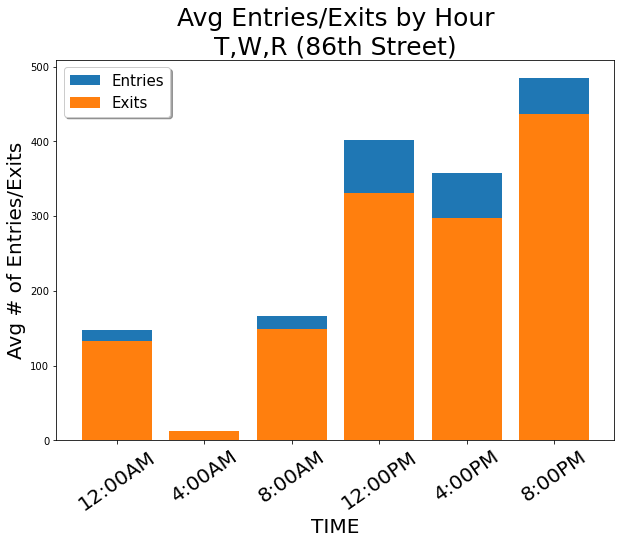

In [31]:
#busy day entries 


plt.figure(figsize=(10, 7))
x_axis_busy_entry = sorted(eightsix_daily[busy_mask]['TIME'].unique())
y_axis_busy_entry = eightsix_daily[busy_mask].groupby(["TIME"]).mean("DAILY_ENTRIES")["DAILY_ENTRIES"]

x_axis_busy_exit = sorted(eightsix_daily[busy_mask]['TIME'].unique())
y_axis_busy_exit = eightsix_daily[busy_mask].groupby(["TIME"]).mean("DAILY_EXITS")["DAILY_EXITS"]

plt.bar(x_axis_busy_entry,y_axis_busy_entry)
plt.bar(x_axis_busy_exit,y_axis_busy_exit)



times = ['12:00AM', '4:00AM', '8:00AM','12:00PM', '4:00PM','8:00PM']
ticks_x = np.linspace(0,5,6)
plt.xlabel('TIME', fontsize = 20)
plt.xticks(ticks_x,times, rotation=35, fontsize = 20)

plt.ylabel('Avg # of Entries/Exits', fontsize = 20)
plt.yticks(fontsize = 10)

plt.title('Avg Entries/Exits by Hour\nT,W,R (86th Street)', fontsize = 25)
plt.legend(['Entries','Exits'],shadow = True, loc =2, prop={'size': 15})

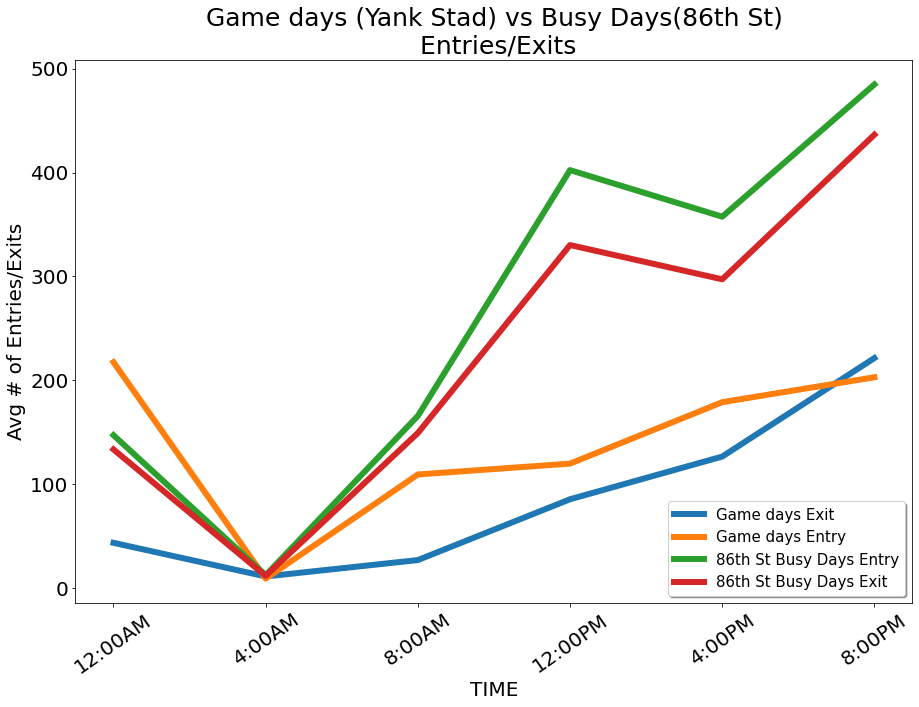

In [32]:
plt.figure(figsize=(15, 10))
x_axis_gameday_entry = sorted(yankee_daily['TIME'].unique())
y_axis_gameday_entry = yankee_daily[gameday_mask].groupby(["TIME"]).mean("DAILY_ENTRIES")["DAILY_ENTRIES"]
x_axis_gameday_exit = sorted(yankee_daily['TIME'].unique())
y_axis_gameday_exit = yankee_daily[gameday_mask].groupby(["TIME"]).mean("DAILY_EXITS")["DAILY_EXITS"]

x_axis_busy_entry = sorted(eightsix_daily['TIME'].unique())
y_axis_busy_entry = eightsix_daily[busy_mask].groupby(["TIME"]).mean("DAILY_ENTRIES")["DAILY_ENTRIES"]
x_axis_busy_exit = sorted(eightsix_daily['TIME'].unique())
y_axis_busy_exit = eightsix_daily[busy_mask].groupby(["TIME"]).mean("DAILY_EXITS")["DAILY_EXITS"]

plt.plot(x_axis_gameday_exit,y_axis_gameday_exit, linewidth = 6)
plt.plot(x_axis_gameday_entry,y_axis_gameday_entry, linewidth = 6)
plt.plot(x_axis_busy_entry,y_axis_busy_entry, linewidth = 6)
plt.plot(x_axis_busy_exit,y_axis_busy_exit, linewidth = 6)


times = ['12:00AM', '4:00AM', '8:00AM','12:00PM', '4:00PM','8:00PM']
ticks_x = np.linspace(0,5,6)
plt.xlabel('TIME', fontsize = 20)
plt.xticks(ticks_x,times, rotation=35, fontsize = 20)

plt.ylabel('Avg # of Entries/Exits', fontsize = 20)
plt.yticks(fontsize = 20)

plt.title('Game days (Yank Stad) vs Busy Days(86th St)\n Entries/Exits', fontsize = 25,)
plt.legend(['Game days Exit',"Game days Entry",'86th St Busy Days Entry','86th St Busy Days Exit'],shadow = True, loc =4, prop={'size': 15})